In [121]:
def temp_C2K(tc):
    return tc - 273.15
def temp_K2C(tk):
    return tk + 273.15

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

T_R = 25.5
R = 3.3e3
V0 = 2.44

In [123]:
def Rth(V):    
    beta = 1/2-V/V0
    r = beta*R/(1-beta)
    return r

(array([ 3.47821932e+02, -4.11974618e+01,  7.21273024e-02]),
 array([6.73674159e-01, 1.22063968e-01, 5.69326693e-04]))

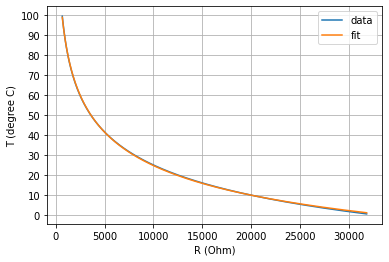

In [131]:
# R to T
thermistor = pd.read_csv('thermistor.csv').to_numpy()
Tth=thermistor[:,0];Rth=thermistor[:,1]

tth_func = lambda r,A,B,C: A+B*np.log(r)+C*np.log(r)**3
[pt,pcovt]=curve_fit(tth_func,Rth,Tth)

plt.plot(Rth,Tth,label='data')
plt.plot(Rth,tth_func(Rth,*pt),label='fit')
plt.xlabel('R (Ohm)'); plt.ylabel('T (degree C)')
plt.yticks(np.linspace(0,100,11))
plt.grid()
plt.legend()

pt,np.sqrt(np.diag(pcovt))

In [125]:
# solution from ice's law of cooling
hot = lambda t,dT,A: T_R - dT*np.exp(-A*t)
ice = lambda t,dT,A: T_R + dT*np.exp(-A*t)

In [126]:
fname = 'hot.txt'

data = []
cnt = 1
with open(fname, 'r') as infile:
    for line in infile:
        if cnt%11 == 0 and cnt!=11:
            data.append(line.split(sep=','))
        cnt+=1
data_hot = np.asarray(data, dtype = float)

t_hot = data_hot[:,0]
isNew=False
for i in range(0,len(t_hot)):
    if t_hot[i]==0 and i!=0:
        if isNew: 
            continue 
        else:
            isNew=True
    t_hot[i]=t_hot[i]+(i-1)*0.5 
Vth_hot = data_hot[:,1]; V0_hot=Vth_hot[0]


beta = 1/2-Vth_hot/V0
Rth_hot = beta*R/(1-beta)
T_hot=tth_func(Rth_hot,*pt)

c:\Users\Windows\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([  1.       , 301.9920663])

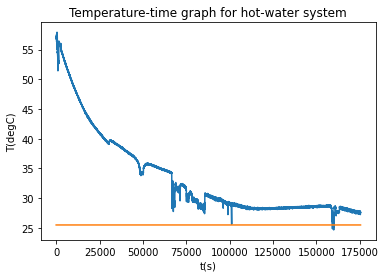

In [127]:
plt.title('Temperature-time graph for hot-water system')
plt.xlabel('t(s)')
plt.ylabel('T(degC)')
plt.plot(t_hot,T_hot,label='data')

[phot,pcovhot]=curve_fit(hot,t_hot,T_hot)
Th = hot(t_hot,*phot)
plt.plot(t_hot,Th,label='newton')

phot

In [128]:
fname = 'ice.txt'

data = []
cnt = 1
with open(fname, 'r') as infile:
    for line in infile:
        if cnt%11 == 0 and cnt!=11:
            data.append(line.split(sep=','))
        cnt+=1
data_ice = np.asarray(data, dtype = float)

t_ice = data_ice[:,0]
Vth_ice = data_ice[:,1]; V0_ice=Vth_ice[0]


beta = 1/2-Vth_ice/V0
Rth_ice = beta*R/(1-beta)
T_ice=tth_func(Rth_ice,*pt)


(array([1., 1.]), array([inf, inf]))

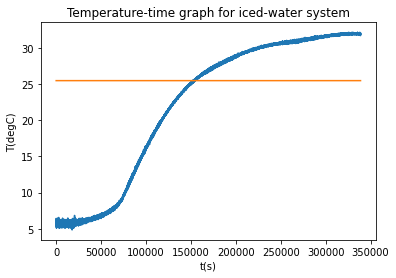

In [129]:
plt.title('Temperature-time graph for iced-water system')
plt.xlabel('t(s)')
plt.ylabel('T(degC)')
plt.plot(t_ice,T_ice,label='data')

[pice,pcovice]=curve_fit(ice,t_ice,T_ice)
Ti = ice(t_ice,*pice)
plt.plot(t_ice,Ti,label='newton')

pice, np.sqrt(np.diag(pcovice))